# Racines d'un polynôme

racine du polynôme 0.0 + 1.0·x + 5.0·x² + 1.0·x³ - 1.0·x⁴
[-1.65544238 -0.21075588  0.          2.86619826]


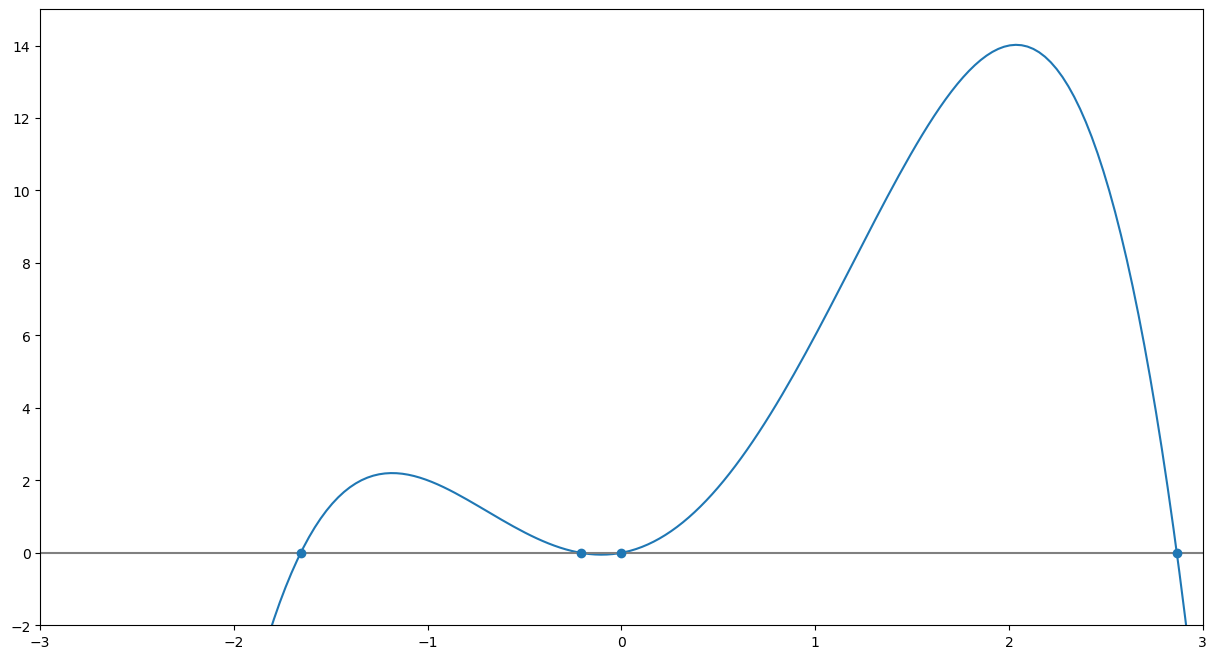

In [153]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
import numpy.polynomial.polynomial as poly

if __name__ == "__main__":
    # définition d'un polynôme par ses coefficients, ils sont par ordre croissant de puissance
    # coeffs = [-1,0,0,1]
    coeffs = [0, 1, 5, 1, -1]
    # définition du polynome
    pol = poly.Polynomial(coeffs)
    # le polynôme correspond à -1+x^3

    xs = np.linspace(-3, 3, 200)
    poly_values = poly.polyval(xs, coeffs)

    # Calcul des racines du polynome
    roots_poly = pol.roots()
    # Racines, attention, les racines complexes sont également fournies si jamais il y en a !
    print("racine du polynôme {}".format(pol))
    print(roots_poly)

    # tracé du polynôme
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    # tracé du polynôme
    ax1.plot(xs, poly_values)
    # Tracé des racines
    ax1.scatter(roots_poly, poly.polyval(roots_poly, coeffs), zorder=20)

    # limites et décor
    ax1.set_ylim(-2, 15)
    ax1.set_xlim(-3, 3)
    ax1.hlines(0, -3, 3, color="gray")

    plt.show()

# Exemple avec la méthode de Newton-Raphson pour trouver f(x)=0

En fonction de l'indication de la dérivée et ou de la dérivée seconde, la solution trouvée n'est pas toujours la même et la vitesse de la convergence diffère également.

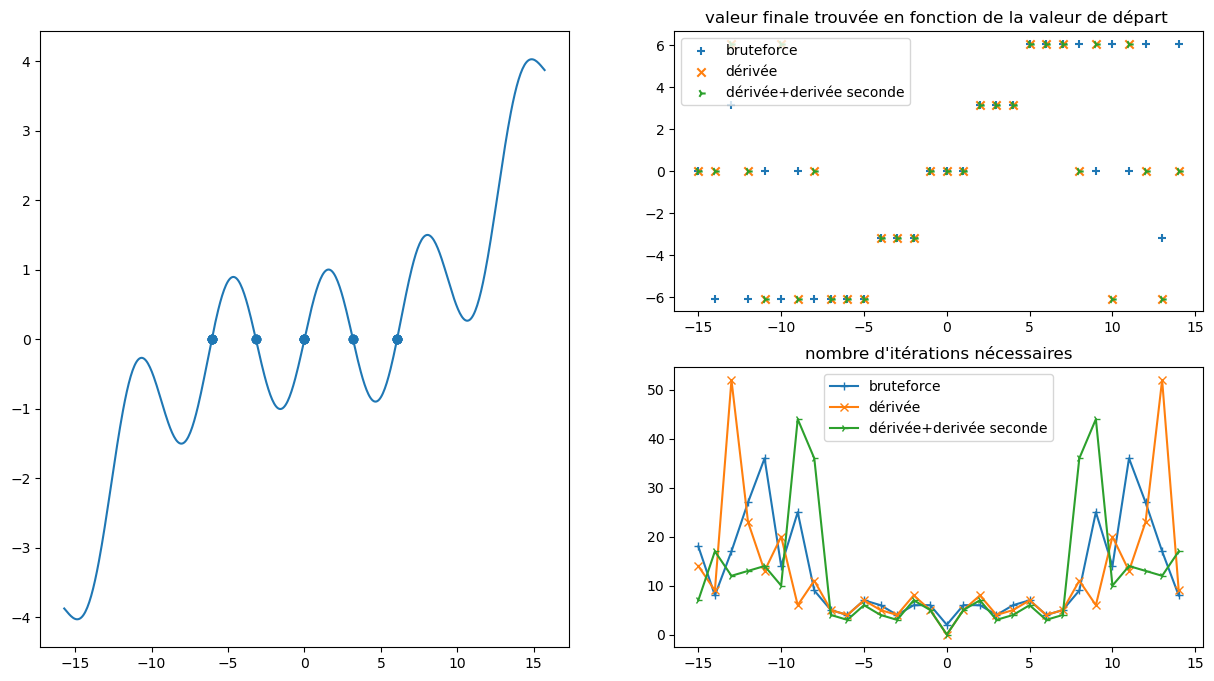

In [31]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize


def func_start(x):
    """
    x abscisses
    """
    return 1e-3 * x**3 + np.sin(x)


def func_prime(x):
    """
    x abscisses
    """
    return 1e-3 * 3 * x**2 + np.cos(x)


def func_prime2(x):
    """
    x abscisses
    """
    return 1e-3 * 3 * 2 * x - np.sin(x)


# Programme principal
if __name__ == "__main__":
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    x = np.linspace(-5 * np.pi, 5 * np.pi, 500)
    ax1.plot(x, func_start(x))
    solutions_brute = []
    nb_iters_brute = []

    solutions_prime = []
    nb_iters_prime = []

    solutions_prime2 = []
    nb_iters_prime2 = []

    xs = np.arange(-15, 15)
    for start in xs:
        # Appel de la fonction brute
        (
            res,
            r,
        ) = optimize.newton(func_start, start, full_output=True)
        solutions_brute.append(res)
        nb_iters_brute.append(r.iterations)

        # Appel de la fonction avec la dérivée fournie
        res, r, = optimize.newton(
            func_start, start, fprime=func_prime, full_output=True, maxiter=200
        )
        solutions_prime.append(res)
        nb_iters_prime.append(r.iterations)

        # Appel de la fonction avec la dérivée et la dérivée seconde fournies
        res, r, = optimize.newton(
            func_start, start, fprime=func_prime, fprime2=func_prime2, full_output=True
        )
        solutions_prime2.append(res)
        nb_iters_prime2.append(r.iterations)

        # print('start : {}, valeur finale {} trouvée avec {} itérations'.format(start, res,  r.iterations))
    solutions_brute = np.asarray(solutions_brute)
    vals_zeros_brute = func_start(solutions_brute)
    ax1.scatter(solutions_brute, vals_zeros_brute, marker="o")

    # valeurs finales trouvées en fonction de la valeur de départ
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.scatter(xs, solutions_brute, marker="+", label="bruteforce")
    ax2.scatter(xs, solutions_prime, marker="x", label="dérivée")
    ax2.scatter(xs, solutions_prime, marker="4", label="dérivée+derivée seconde")
    ax2.set_title("valeur finale trouvée en fonction de la valeur de départ ")
    ax2.legend()
    # nmbre d'itérations nécessaires
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(xs, nb_iters_brute, marker="+", label="bruteforce")
    ax3.plot(xs, nb_iters_prime, marker="x", label="dérivée")
    ax3.plot(xs, nb_iters_prime2, marker="4", label="dérivée+derivée seconde")
    ax3.set_title("nombre d'itérations nécessaires")
    ax3.legend()
    plt.show()

# Exemple avec la méthode Brentq  pour trouver f(x)=0
Ici, il est possible de spécifier des bornes \[a,b\]. Mais la fonction doit avoir un signe différent pour f(a) et f(b) ce qui demande un peu plus d'analyse de fonction dans certains cas. On peut voir qu'ici, le zéro trouvé est plus stable qu'avec la méthode de Newton et que la convergence est pour ce cas précis, beaucoup plus rapide.

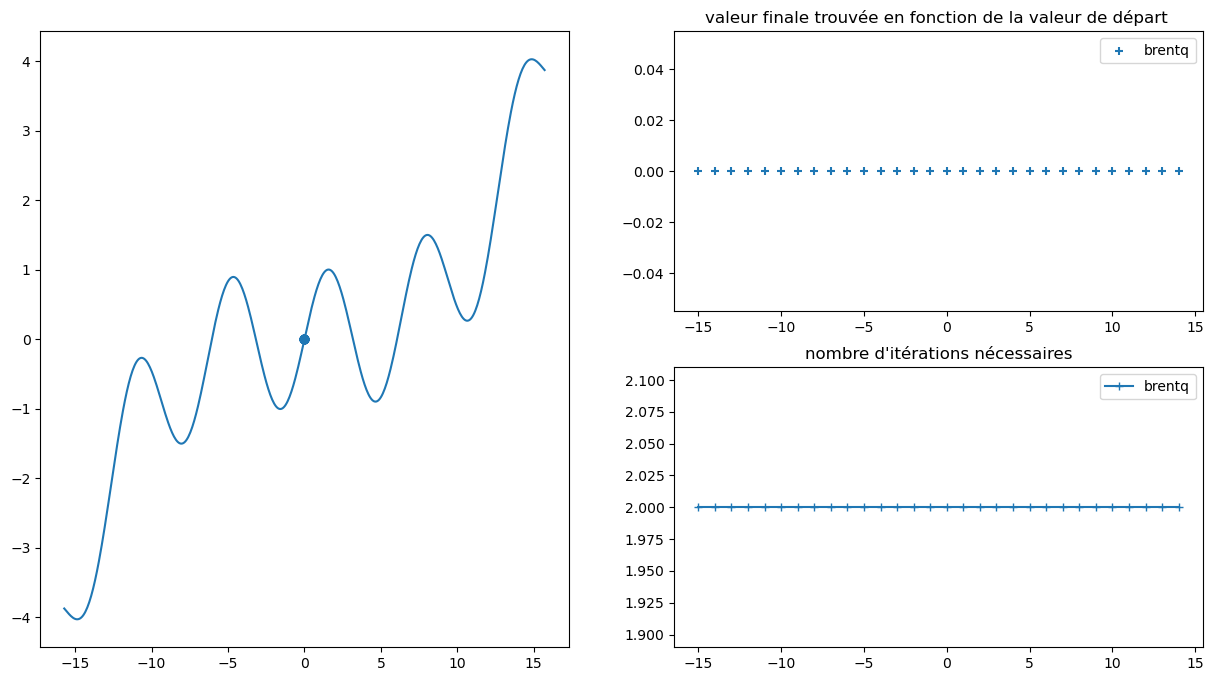

In [35]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize


def func_start(x):
    """
    x abscisses
    """
    return 1e-3 * x**3 + np.sin(x)


# Programme principal
if __name__ == "__main__":
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    x = np.linspace(-5 * np.pi, 5 * np.pi, 500)
    ax1.plot(x, func_start(x))
    solutions_brentq = []
    nb_iters_brentq = []

    xs = np.arange(-15, 15)
    for start in xs:
        # Appel de la fonction brute
        (
            res,
            r,
        ) = optimize.brentq(func_start, -15, 15, full_output=True)
        solutions_brentq.append(res)
        nb_iters_brentq.append(r.iterations)

        # print('start : {}, valeur finale {} trouvée avec {} itérations'.format(start, res,  r.iterations))
    solutions_brentq = np.asarray(solutions_brentq)
    vals_zeros_brentq = func_start(solutions_brentq)
    ax1.scatter(solutions_brentq, vals_zeros_brentq, marker="o")

    # valeurs finales trouvées en fonction de la valeur de départ
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.scatter(xs, solutions_brentq, marker="+", label="brentq")
    ax2.set_title("valeur finale trouvée en fonction de la valeur de départ ")
    ax2.legend()
    # nmbre d'itérations nécessaires
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(xs, nb_iters_brentq, marker="+", label="brentq")
    ax3.set_title("nombre d'itérations nécessaires")
    ax3.legend()
    plt.show()

# Une fonction plus souple pour trouver une égalité f(x) = a plutôt que f(x)=0

Ici, la différence principale est de définir une fonction dont on cherche le zéro sous la forme f(x) -a = 0. De plus, on utilise la syntaxe `args=()` pour fournir des paramètres fixés à la fonction fournie pour trouver le zéro.

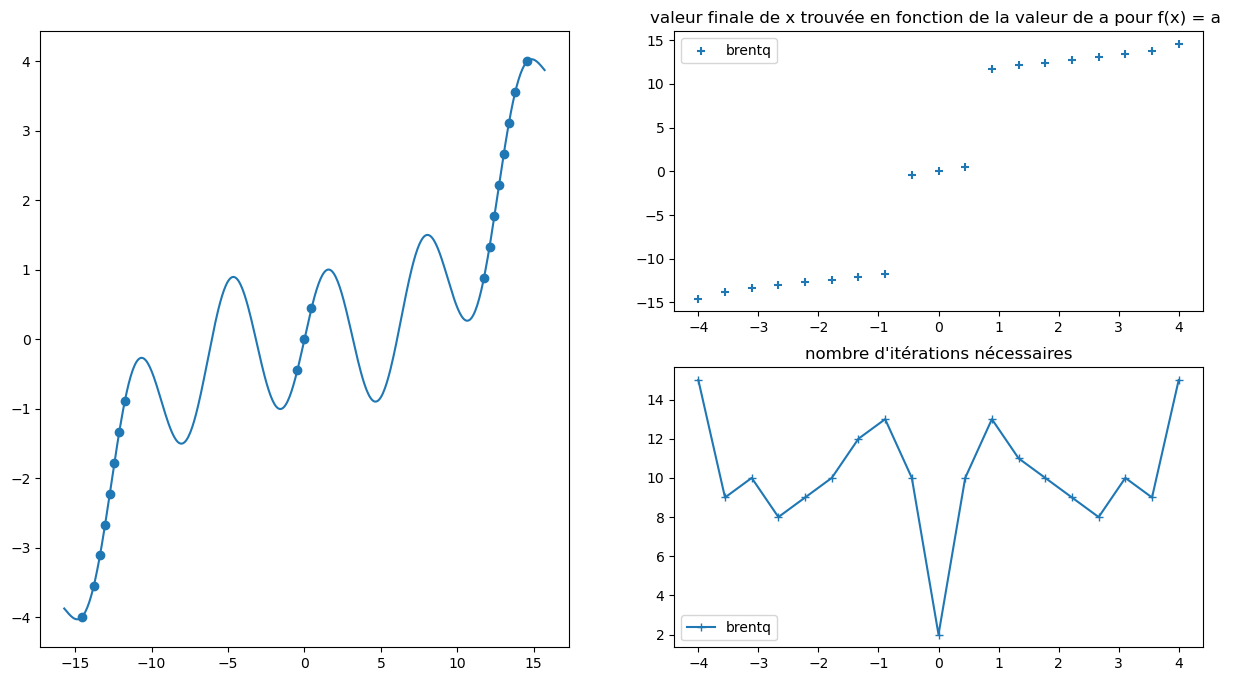

In [95]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize


def func_start(x):
    """
    x abscisses
    """
    return 1e-3 * x**3 + np.sin(x)


def func_zero(x, func, a):
    """
    fonction intermédiaire dont on cherche le zéro
    x : abscisse
    func : fonction à minimiser
    a : valeur pour laquelle on cherche func(x)=a
    """
    return func(x) - a


# Programme principal
if __name__ == "__main__":
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    x = np.linspace(-5 * np.pi, 5 * np.pi, 500)
    ax1.plot(x, func_start(x))
    solutions_brentq = []
    nb_iters_brentq = []

    target_values = np.linspace(-4, 4, 19)
    for target in target_values:
        # Appel de la fonction AVEC L'OPTION args=()
        # pour indiquer la valeur de a pour trouver f(x) = a ainsi que la fonction f
        res, r, = optimize.brentq(
            func_zero, -15, 15, args=(func_start, target), full_output=True
        )
        solutions_brentq.append(res)
        nb_iters_brentq.append(r.iterations)

        # print('start : {}, valeur finale {} trouvée avec {} itérations'.format(start, res,  r.iterations))
    solutions_brentq = np.asarray(solutions_brentq)
    vals_zeros_brentq = func_start(solutions_brentq)
    ax1.scatter(solutions_brentq, vals_zeros_brentq, marker="o")

    # valeurs finales trouvées en fonction de la valeur de a
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.scatter(target_values, solutions_brentq, marker="+", label="brentq")
    ax2.set_title(
        "valeur finale de x trouvée en fonction de la valeur de a pour f(x) = a "
    )
    ax2.legend()
    # nmbre d'itérations nécessaires
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(target_values, nb_iters_brentq, marker="+", label="brentq")
    ax3.set_title("nombre d'itérations nécessaires")
    ax3.legend()
    plt.show()

# Avec différentes méthodes

Pour une fonction particulièrement non linéarisable :
$$ f(x) = 0,001 x^3 +4 \sin(4,2x)+0,01 (x-4) + 0,02 \sqrt{x+25}+\ln(x+16)$$
Les vitesses de convergences, solutions et stabilités sont très variables. 

Pour la méthode de Newton, il n'y a plus forcément de convergence car on peut tomber dans un domaine où il faudrait calculer le log (ou la racine carré) d'un nombre négatif.

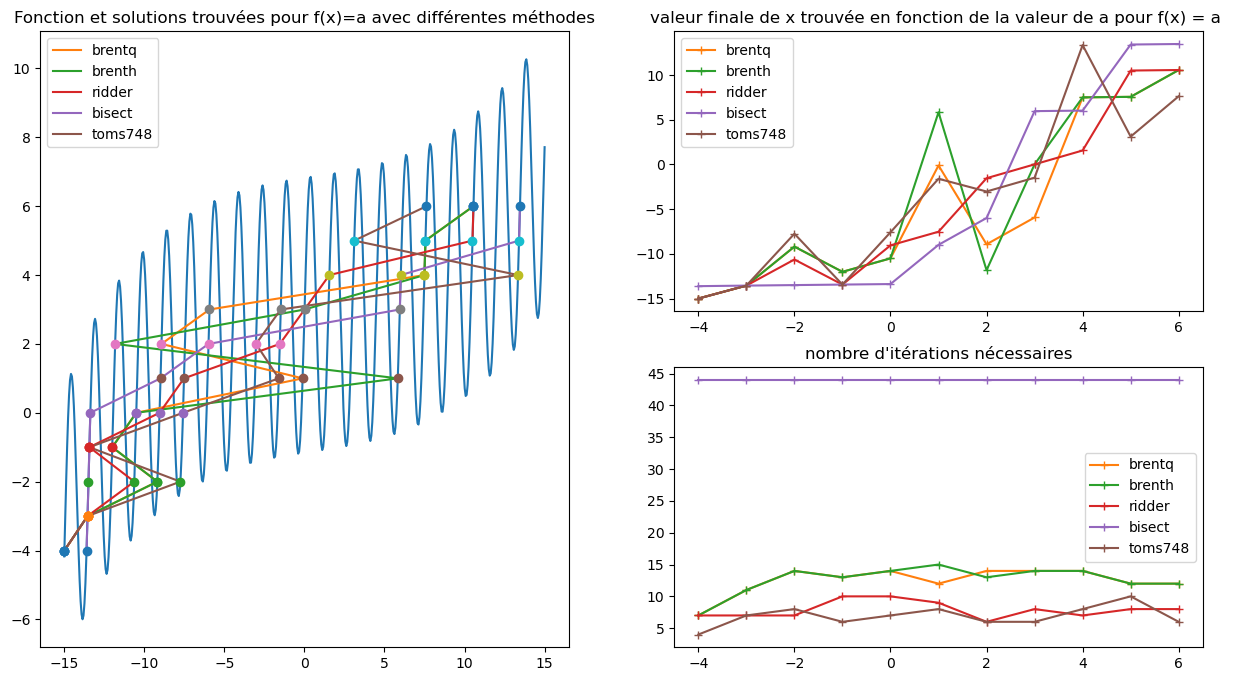

In [130]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import numpy as np
import scipy.optimize as optimize

cycle_color = plt.rcParams["axes.prop_cycle"].by_key()["color"]


def func_start(x):
    """
    x abscisses
    """
    return (
        1e-3 * x**3
        + 4 * np.sin(4.2 * x)
        + 0.01 * (x - 4)
        + 0.02 * np.sqrt(x + 25)
        + np.log(x + 16)
    )


def func_zero(x, func, a):
    """
    fonction intermédiaire dont on cherche le zéro
    x : abscisse
    func : fonction à minimiser
    a : valeur pour laquelle on cherche func(x)=a
    """
    return func(x) - a


# Programme principal
if __name__ == "__main__":
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)
    ax1 = fig.add_subplot(gs[:, 0])
    x = np.linspace(-15, 15, 500)

    ax1.plot(x, func_start(x))
    sampling = 11
    solutions = np.zeros((sampling, 5))
    nb_iters = np.zeros((sampling, 5))

    target_values = np.linspace(-4, 6, sampling)
    method_names = ["brentq", "brenth", "ridder", "bisect", "toms748"]
    for i, method in enumerate(
        [
            optimize.brentq,
            optimize.brenth,
            optimize.ridder,
            optimize.bisect,
            optimize.toms748,
        ]
    ):
        for j, target in enumerate(target_values):
            # Appel de la fonction brute
            (
                res,
                r,
            ) = method(func_zero, -15, 15, args=(func_start, target), full_output=True)
            solutions[j, i] = res
            nb_iters[j, i] = r.iterations

    vals_zeros = func_start(solutions)
    for j, target in enumerate(target_values):
        ax1.scatter(solutions[j, :], vals_zeros[j, :], marker="o", zorder=20)
    for i, method_name in enumerate(method_names):
        ax1.plot(
            solutions[:, i],
            vals_zeros[:, i],
            label=method_name,
            color=cycle_color[i + 1],
        )

    ax1.legend()
    ax1.set_title(
        "Fonction et solutions trouvées pour f(x)=a avec différentes méthodes"
    )

    # valeurs finales trouvées en fonction de la valeur de départ
    ax2 = fig.add_subplot(gs[0, 1])
    for i, method_name in enumerate(method_names):
        ax2.plot(
            target_values,
            solutions[:, i],
            marker="+",
            label=method_name,
            color=cycle_color[i + 1],
        )

    ax2.set_title(
        "valeur finale de x trouvée en fonction de la valeur de a pour f(x) = a "
    )
    ax2.legend()
    # nmbre d'itérations nécessaires
    ax3 = fig.add_subplot(gs[1, 1])
    for i, method_name in enumerate(method_names):
        ax3.plot(
            target_values,
            nb_iters[:, i],
            marker="+",
            label=method_name,
            color=cycle_color[i + 1],
        )

    ax3.set_title("nombre d'itérations nécessaires")
    ax3.legend()
    plt.show()